## 1. Introduction to sentiment analysis in finance with VADER

- **VADER** is a **rule-based sentiment analysis algorithm**, that uses a set of rules to specify a mathematical model without explicitly coding it. It consumes fewer resources as compared to Machine Learning models as there is no need for vast amounts of training data. Its resource-efficient approach helps us to decode and quantify **the emotions** contained in streaming media such as **text, audio or video**. 

- **VADER** stands for **V**alence **A**ware **D**ictionary for s**E**ntiment **R**easoning.

### 1.1 How accurate is VADER?

- Study shows that VADER performs as good as individual human raters at matching ground truth. In fact, by inspecting the F1 scores, we see that VADER (0.96) outperforms individual human raters (0.84) at correctly labelling the sentiment of tweets into positive, neutral, or negative classes. The reason behind this is that VADER is sensitive to both **Polarity** (whether the sentiment is positive or negative) and **Intensity** (how positive or negative is sentiment) of emotions.

- VADER incorporates this by providing **a Valence Score** to the word into consideration. This brings us to the next section.

### 1.2 What is a valence score?

- It is a score assigned to the word under consideration by means of observation and experiences rather than pure logic.

- Consider the words 'terrible' , 'hopeless', 'miserable'. Any self-aware Human would easily gauge the sentiment of these words as Negative.
While on the other side, words like 'marvellous', 'worthy', 'adequate' are signifying positive sentiment.

- According to the academic paper on VADER, the Valence score is measured on a scale from -4 to +4, where -4 stands for the most ‘Negative’ sentiment and +4 for the most ‘Positive’ sentiment. Intuitively one can guess that midpoint 0 represents ‘Neutral’ Sentiment, and this is how it is defined actually too.

### 1.3 How does VADER calculate the Valence score of an input text?

- **VADER** relies on a dictionary that maps words and other numerous lexical features common to sentiment expression in microblogs.

- These features include:

  1. A full list of Western-style emoticons ( for example - :D and :P )
  2. Sentiment-related acronyms ( for example - LOL and ROFL )
  3. Commonly used slang with sentiment value ( for example - Nah and meh )

- Manually creating a thorough sentiment dictionary is a labour-intensive and sometimes error-prone process. Thus it is no wonder that many Natural Language Processing (NLP) researchers rely so heavily on existing dictionaries as primary resources.

In [ ]:
!pip install yfinance backtrader

     |████████████████████████████████| 410 kB 7.8 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 32.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests 
import yfinance as yf
from wordcloud import WordCloud, STOPWORDS
from pandas.tseries.offsets import BDay
import pandas as pd
import matplotlib.pyplot as plt
import backtrader as bt
import backtrader.indicators as btind
import numpy as np
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Create an analyzer object
analyzer = SentimentIntensityAnalyzer()

### 1.4 How does VADER calculate the Valence score of an input sentence?



- **VADER** makes use of certain rules to incorporate the impact of each sub-text on the perceived intensity of sentiment in sentence-level text. These rules are called **Heuristics**. There are 5 of them:

1. **Punctuation** namely the exclamation point (!), increases the magnitude of the intensity without modifying the semantic orientation. For example: “The weather is hot!!!” is more intense than “The weather is hot.”

2. **Capitalization**, specifically using ALL-CAPS to emphasize a sentiment-relevant word in the presence of other non-capitalized words, increases the magnitude of the sentiment intensity without affecting the semantic orientation. For example: “The weather is HOT.” conveys more intensity than “The weather is hot.”

3. **Degree modifiers** (also called intensifiers, booster words, or degree adverbs) impact sentiment intensity by either increasing or decreasing the intensity. For example: “The weather is extremely hot.” is more intense than “The weather is hot.”, whereas “The weather is slightly hot.” reduces the intensity.

4. **Polarity shift due to Conjunctions:** the contrastive conjunction “but” signals a shift in sentiment polarity, with the sentiment of the text following the conjunction being dominant. For example: “The weather is hot, but it is bearable.” has mixed sentiment, with the latter half dictating the overall rating.

5. **Catching Polarity Negation** by examining the contiguous sequence of 3 items preceding a sentiment-laden lexical feature, we catch nearly 90% of cases where negation flips the polarity of the text. For example a negated sentence would be “The weather isn't really that hot.”.

- These are some examples to explain the five heuristics mentionned before

In [ ]:
sentences = ["Bob is smart, boring, and creative.",  # base example
             "Bob is smart, boring, and creative !!!!!!",  # using punctuations
             "Bob is SMART, boring, and CREATIVE.",  # using CAPS
             "Bob is smart, boring, and super creative.",  # using degree modifiers (example 1)
             "Bob is smart, slightly boring, and creative.",  # using degree modifiers (example 2)
             "Bob is smart, boring, and creative but procrastinates a lot.",  # Polarity shift due to Conjunctions
             "Bob isn't smart at all.",  # Catching Polarity Negation
             ]


for i in range(len(sentences)):
    vs = analyzer.polarity_scores(sentences[i])
    print("{} --> {}".format(sentences[i], str(vs)))

Bob is smart, boring, and creative. --> {'neg': 0.211, 'neu': 0.275, 'pos': 0.514, 'compound': 0.5106}
Bob is smart, boring, and creative !!!!!! --> {'neg': 0.176, 'neu': 0.306, 'pos': 0.518, 'compound': 0.6671}
Bob is SMART, boring, and CREATIVE. --> {'neg': 0.186, 'neu': 0.243, 'pos': 0.571, 'compound': 0.6971}
Bob is smart, boring, and super creative. --> {'neg': 0.155, 'neu': 0.203, 'pos': 0.642, 'compound': 0.802}
Bob is smart, slightly boring, and creative. --> {'neg': 0.177, 'neu': 0.353, 'pos': 0.47, 'compound': 0.5154}
Bob is smart, boring, and creative but procrastinates a lot. --> {'neg': 0.144, 'neu': 0.524, 'pos': 0.332, 'compound': 0.2846}
Bob isn't smart at all. --> {'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}


## 2. Adding news sentiment analysis with a short/long term SMA strategy

- Let's start by building a simple short/long term SMA strategy, and then add sentiments scores to refine the generated trading signals

In [ ]:
# Get AAPL data stock for year 2021
aapl = yf.Ticker("AAPL")
df_apple = aapl.history(start="2022-1-1", end="2022-2-26", interval="1d")
df_apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,177.603723,182.647300,177.483880,181.778397,104487900,0.0,0
2022-01-04,182.397624,182.707227,178.892080,179.471344,99310400,0.0,0
2022-01-05,179.381453,179.940738,174.417776,174.697418,94537600,0.0,0
2022-01-06,172.480249,175.076947,171.421601,171.781143,96904000,0.0,0
2022-01-07,172.670013,173.918422,170.812379,171.950928,86580100,0.0,0


### 2.1 Scraping news articles about Apple stock using News API

- **News API** is a simple HTTP REST API that returns JSON files with breaking news headlines and search for articles from over 30,000 news sources and blogs.

- One can search for articles with any combination of the following criteria:

  1. **Keyword or phrase**, Eg: find all articles containing the word 'AMD'.
  2. **Date published**, Eg: find all articles published yesterday.
  3. **Source name**, Eg: find all articles by 'TechCrunch'.
  4. **Source domain name**, Eg: find all articles published on gizmodo.com.
  5. **Language**, Eg: find all articles written in English.

- One needs an API key to use the API - this is a unique key that identifies your requests.

In [ ]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

# Specify the query and number of returns
parameters = {'q': 'Apple', 
              'sortBy': 'popularity', 
              'pageSize': 100,  
              'apiKey': '77869638ed9348c3a5fdb9ea5ca4670b', 
             }

# Make a GET request to news API
response = requests.get(url, params=parameters)

In [ ]:
# Make a news dataframe
df_news = pd.DataFrame(response.json()['articles'])
df_news['publishedAt'] = pd.to_datetime(df_news['publishedAt'])
df_news.sort_values(by='publishedAt', inplace=True)
df_news.head(6)

,source,author,title,description,url,urlToImage,publishedAt,content
1,"{'id': None, 'name': 'Lifehacker.com'}",Jake Peterson,Your iPhone's Alarm Doesn't Have to Be so Anno...,We all know the iPhone’s alarm is anything but...,https://lifehacker.com/your-iphones-alarm-does...,https://i.kinja-img.com/gawker-media/image/upl...,2022-01-25 21:00:00+00:00,We all know the iPhones alarm is anything but ...
33,"{'id': 'engadget', 'name': 'Engadget'}",Mat Smith,The Morning After: Neil Young threatens to pul...,Musician Neil Young has asked his management t...,https://www.engadget.com/the-morning-after-nei...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-01-26 12:15:44+00:00,Musician Neil Young has asked his management t...
51,"{'id': 'the-verge', 'name': 'The Verge'}",Becca Farsace,How to take better night photos with the Pixel...,"Becca Farsace took cameras from Sony, Canon, F...",https://www.theverge.com/22895478/astrophotogr...,https://cdn.vox-cdn.com/thumbor/vI0625W1b83z-l...,2022-01-26 15:00:00+00:00,"Yes, even you can get a great photo of the nig..."
26,"{'id': 'engadget', 'name': 'Engadget'}",Kris Holt,Huawei is releasing the P50 Pro and Pocket out...,Huawei\r\n is set to start selling the P50 Pro...,https://www.engadget.com/huawei-p-50-pro-p-50-...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-01-26 15:46:32+00:00,Huawei\r\n is set to start selling the P50 Pro...
11,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Apple marks Black History Month with a 'Black ...,Apple is honoring Black History Month once aga...,https://www.engadget.com/apple-watch-black-uni...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-01-26 16:16:01+00:00,Apple is honoring Black History Month once aga...
96,"{'id': 'ars-technica', 'name': 'Ars Technica'}",Ars Staff,"Today’s best deals: Apple AirPods Pro, MacBook...","Dealmaster also has Wacom tablets, AMD Ryzen C...",https://arstechnica.com/staff/2022/01/todays-b...,https://cdn.arstechnica.net/wp-content/uploads...,2022-01-26 17:58:35+00:00,0 with 0 posters participating\r\nIt's time fo...


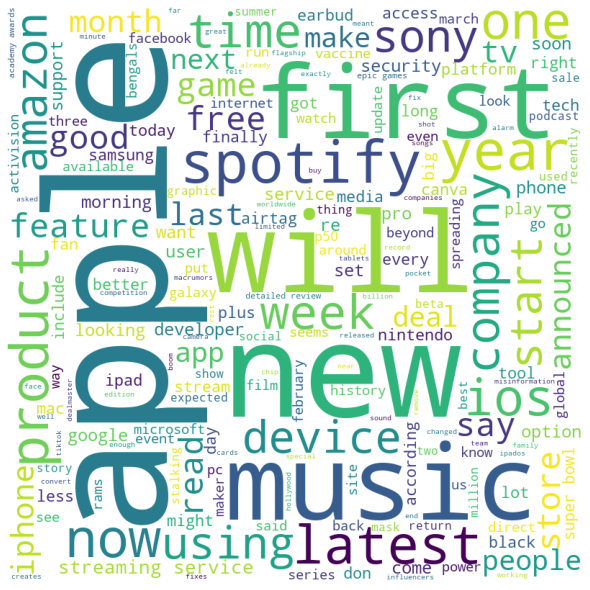

In [ ]:
# Visualizing most common words abt Apple
stopwords = set(STOPWORDS)
words = ""
for descrip in df_news['description']: 
    tokens = descrip.split()
    tokens = [token.lower() for token in tokens]
    words += " ".join(tokens)

wordcloud = WordCloud(width = 800,
                      height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(words) 
  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
df_news.shape

(100, 8)

### 2.2 Data pre-processing

- The problem that might occur is that the news date can be a week-end day , or some holiday day. So, we need to make sure those days are trading days

In [ ]:
def get_trade_open(date):
    """
    Get the business day for which particular news headline should be used to make trade calls
    """
    curr_date_open = date.floor('d').replace(hour=13, minute=30) - BDay(0)
    curr_date_close = date.floor('d').replace(hour=20, minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20, minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13, minute=30)
    
    # If the news date is between two trading days
    if date >= prev_date_close and date < curr_date_open:
        return curr_date_open
    # If the news date falls into a week-end or holiday day
    elif date >= curr_date_close and date < next_date_open:
        return next_date_open

    return None

In [ ]:
# Apply the previous function to correct news dates
df_news["Date"] = df_news["publishedAt"].apply(get_trade_open).dt.date
df_news = df_news[pd.notnull(df_news['Date'])]
df_news.head()

,source,author,title,description,url,urlToImage,publishedAt,content,Date
1,"{'id': None, 'name': 'Lifehacker.com'}",Jake Peterson,Your iPhone's Alarm Doesn't Have to Be so Anno...,We all know the iPhone’s alarm is anything but...,https://lifehacker.com/your-iphones-alarm-does...,https://i.kinja-img.com/gawker-media/image/upl...,2022-01-25 21:00:00+00:00,We all know the iPhones alarm is anything but ...,2022-01-26
33,"{'id': 'engadget', 'name': 'Engadget'}",Mat Smith,The Morning After: Neil Young threatens to pul...,Musician Neil Young has asked his management t...,https://www.engadget.com/the-morning-after-nei...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-01-26 12:15:44+00:00,Musician Neil Young has asked his management t...,2022-01-26
77,"{'id': None, 'name': 'Gizmodo.com'}",Shoshana Wodinsky,LG’s Latest Announcement Solidifies Everything...,It’s a well established fact on the internet t...,https://gizmodo.com/lg-s-latest-announcement-s...,https://i.kinja-img.com/gawker-media/image/upl...,2022-01-26 21:30:00+00:00,Its a well established fact on the internet th...,2022-01-27
88,"{'id': None, 'name': 'New York Times'}",The New York Times,Moderna Tests Booster Designed for Omicron,The company’s effort comes as Pfizer and BioNT...,https://www.nytimes.com/live/2022/01/27/world/...,https://static01.nyt.com/images/2022/01/26/mul...,2022-01-27 10:15:58+00:00,"Neil Young, left, moved to take his music off ...",2022-01-27
34,"{'id': 'engadget', 'name': 'Engadget'}",Mat Smith,The Morning After: NVIDIA’s RTX 3050 GPU has l...,Graphics cards are fetching prices normally re...,https://www.engadget.com/the-morning-after-nvi...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-01-27 12:15:39+00:00,Graphics cards are fetching prices normally re...,2022-01-27


In [ ]:
# Compute a compound VADER score for each news headline
df_news['compound_vader_score'] = df_news['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_news.head()

,source,author,title,description,url,urlToImage,publishedAt,content,Date,compound_vader_score
1,"{'id': None, 'name': 'Lifehacker.com'}",Jake Peterson,Your iPhone's Alarm Doesn't Have to Be so Anno...,We all know the iPhone’s alarm is anything but...,https://lifehacker.com/your-iphones-alarm-does...,https://i.kinja-img.com/gawker-media/image/upl...,2022-01-25 21:00:00+00:00,We all know the iPhones alarm is anything but ...,2022-01-26,-0.7088
33,"{'id': 'engadget', 'name': 'Engadget'}",Mat Smith,The Morning After: Neil Young threatens to pul...,Musician Neil Young has asked his management t...,https://www.engadget.com/the-morning-after-nei...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-01-26 12:15:44+00:00,Musician Neil Young has asked his management t...,2022-01-26,-0.3818
77,"{'id': None, 'name': 'Gizmodo.com'}",Shoshana Wodinsky,LG’s Latest Announcement Solidifies Everything...,It’s a well established fact on the internet t...,https://gizmodo.com/lg-s-latest-announcement-s...,https://i.kinja-img.com/gawker-media/image/upl...,2022-01-26 21:30:00+00:00,Its a well established fact on the internet th...,2022-01-27,-0.4767
88,"{'id': None, 'name': 'New York Times'}",The New York Times,Moderna Tests Booster Designed for Omicron,The company’s effort comes as Pfizer and BioNT...,https://www.nytimes.com/live/2022/01/27/world/...,https://static01.nyt.com/images/2022/01/26/mul...,2022-01-27 10:15:58+00:00,"Neil Young, left, moved to take his music off ...",2022-01-27,0.0000
34,"{'id': 'engadget', 'name': 'Engadget'}",Mat Smith,The Morning After: NVIDIA’s RTX 3050 GPU has l...,Graphics cards are fetching prices normally re...,https://www.engadget.com/the-morning-after-nvi...,https://s.yimg.com/os/creatr-uploaded-images/2...,2022-01-27 12:15:39+00:00,Graphics cards are fetching prices normally re...,2022-01-27,0.0000


In [ ]:
df_news.shape

(62, 10)

In [ ]:
# Group by date, and retain only max/min scores
df_scores = df_news.groupby("Date").agg(compound_vader_score_max = ('compound_vader_score', 'max'),
                                        compound_vader_score_min = ('compound_vader_score', 'min'))
df_scores.head()

,compound_vader_score_max,compound_vader_score_min
Date,,
2022-01-26,-0.3818,-0.7088
2022-01-27,0.0000,-0.4767
2022-01-28,0.4019,0.0000
2022-01-31,0.6249,-0.4767
2022-02-02,0.6369,0.0000


In [ ]:
# Summing max/min scores to get final scores
df_scores["final_scores"] = df_scores["compound_vader_score_max"] + df_scores["compound_vader_score_min"]
df_scores.head()

,compound_vader_score_max,compound_vader_score_min,final_scores
Date,,,
2022-01-26,-0.3818,-0.7088,-1.0906
2022-01-27,0.0000,-0.4767,-0.4767
2022-01-28,0.4019,0.0000,0.4019
2022-01-31,0.6249,-0.4767,0.1482
2022-02-02,0.6369,0.0000,0.6369


In [ ]:
df_scores.shape

(20, 3)

## 3. Adding Sentiment scores to Backtrader

In [ ]:
# Create final dataframe
df_final = df_apple.join(df_scores)
df_final["final_scores"] = df_final["final_scores"].fillna(0)
df_final.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,compound_vader_score_max,compound_vader_score_min,final_scores
Date,,,,,,,,,,
2022-01-03,177.603723,182.647300,177.483880,181.778397,104487900,0.0,0,NaN,NaN,0.0
2022-01-04,182.397624,182.707227,178.892080,179.471344,99310400,0.0,0,NaN,NaN,0.0
2022-01-05,179.381453,179.940738,174.417776,174.697418,94537600,0.0,0,NaN,NaN,0.0
2022-01-06,172.480249,175.076947,171.421601,171.781143,96904000,0.0,0,NaN,NaN,0.0
2022-01-07,172.670013,173.918422,170.812379,171.950928,86580100,0.0,0,NaN,NaN,0.0


In [ ]:
# Backtesting parameters
data = bt.feeds.PandasData(dataname=df_final)
startcash = 100000
commission = 0.002
stake = 100

In [ ]:
class TradeLogger(bt.analyzers.Analyzer):
    """
    Analyzer returning closed trades information.
    """

    def start(self):
        super(TradeLogger, self).start()

    def create_analysis(self):
        self.rets = []
        self.vals = dict()

    def notify_trade(self, trade):
        """Receives trade notifications before each next cycle"""
        if trade.isclosed:
            self.vals = {'Date': self.strategy.datetime.datetime(),
                         'Gross PnL': round(trade.pnl, 2),
                         'Net PnL': round(trade.pnlcomm, 2),
                         'Trade commission': trade.commission,
                         'Trade duration (in days)': (trade.dtclose - trade.dtopen)
            }
            self.rets.append(self.vals)

    def get_analysis(self):
        return self.rets


def set_and_run(data, strategy, startcash, commission, stake):
    # Initialize cerebro engine, add the strategy and initial capital
    cerebro = bt.Cerebro()
    cerebro.addstrategy(strategy)
    cerebro.adddata(data)
    cerebro.broker.setcash(startcash)
    print("Starting Portfolio Value: {}".format(cerebro.broker.getvalue()))

    # Set the broker commission
    cerebro.broker.setcommission(commission) 

    # Number of shares to buy/sell
    cerebro.addsizer(bt.sizers.FixedSize, stake=stake)

    # Add evaluation metrics
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, compression=1, factor=365, annualize=True)
    cerebro.addanalyzer(TradeLogger, _name="trade_logger")

    results = cerebro.run()
    print("Final Portfolio Value: {}".format(cerebro.broker.getvalue()))
    print("Sharpe Ratio: {}".format(results[0].analyzers.sharperatio.get_analysis()['sharperatio']))
    display(pd.DataFrame(results[0].analyzers.trade_logger.get_analysis()))

    plt.rcParams['figure.figsize'] = (16, 8)
    fig = cerebro.plot(barupfill=False,
                       bardownfill=False,
                       style='candle',
                       plotdist=0.5, 
                       volume=True,
                       barup='green',
                       valuetags=False,
                       subtxtsize=8)

In [ ]:
class Sentiment(bt.Indicator):
    lines = ('sentiment',)
    plotinfo = dict(
        plotymargin=0.15,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])
    
    def next(self):
        self.date = self.data.datetime
        date = bt.num2date(self.date[0])
        self.sentiment = df_final.loc[date]["final_scores"]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrategy(bt.Strategy):
    params = (('positive', 0.1),
              ('negative', -0.1)
    )

    def __init__(self):
        Sentiment(self.data)
    
    def notify_order(self, order):
        if not order.status == order.Completed:
            return  # discard any other notification

        if not self.position:  # we left the market
            print('SELL @price: {:.2f}'.format(order.executed.price))
            return

        # We have entered the market
        print('BUY @price: {:.2f}'.format(order.executed.price))
        
    def next(self):
        self.date = self.data.datetime
        date = bt.num2date(self.date[0])
        self.sentiment = df_final.loc[date]["final_scores"]

        if not self.position:
            if self.sentiment >= self.params.positive:
                self.buy()
        else:
            if self.sentiment < self.params.negative:
                self.sell()

In [ ]:
# Backtesting the positive/negative thereshold VADER scores
cerebro = bt.Cerebro()
cerebro.adddata(data)
strats = cerebro.optstrategy(SentimentStrategy,
                             positive=np.arange(0.0, 1.5, 0.1),
                             negative=np.arange(-1.5, 0.0, 0.1))
cerebro.broker.setcash(startcash)
cerebro.broker.setcommission(commission) 
cerebro.addsizer(bt.sizers.FixedSize, stake=stake)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, factor=365)
cerebro.addanalyzer(bt.analyzers.VWR, timeframe=bt.TimeFrame.Days, tann=365)
results = cerebro.run()

df_result = pd.DataFrame([{"positive": result[0].params.positive, 
                           "negative": result[0].params.negative,
                           "Sharpe ratio": result[0].analyzers.sharperatio.get_analysis()['sharperatio'], 
                           "Variability weighted return (in %)": result[0].analyzers.vwr.get_analysis()['vwr']
                          } for result in results])
display(df_result.sort_values("Sharpe ratio", ascending=False))

BUY @price: 182.40
BUY @price: 182.40
BUY @price: 182.40
BUY @price: 182.40
SELL @price: 163.84
SELL @price: 163.84
BUY @price: 182.40
BUY @price: 182.40
SELL @price: 163.84
SELL @price: 162.24
BUY @price: 169.94
BUY @price: 182.40
SELL @price: 163.84
SELL @price: 162.24
BUY @price: 169.94
SELL @price: 163.84
BUY @price: 182.40
BUY @price: 182.40
SELL @price: 162.24
SELL @price: 162.24
BUY @price: 169.94
BUY @price: 169.94
SELL @price: 163.84
SELL @price: 163.84
BUY @price: 182.40
BUY @price: 182.40
SELL @price: 162.24
BUY @price: 169.94
SELL @price: 162.24
BUY @price: 169.94
SELL @price: 163.84
SELL @price: 163.84
BUY @price: 182.40
SELL @price: 162.24
BUY @price: 182.40
BUY @price: 169.94
SELL @price: 162.24
SELL @price: 163.84
BUY @price: 169.94
SELL @price: 163.84
BUY @price: 182.40
SELL @price: 162.24
BUY @price: 169.94
BUY @price: 182.40
SELL @price: 163.84
SELL @price: 162.24
BUY @price: 169.94
SELL @price: 164.98
BUY @price: 169.94
BUY @price: 165.54
SELL @price: 163.84
BUY @pr

,positive,negative,Sharpe ratio,Variability weighted return (in %)
29,0.1,-0.1,0.045678,3.596319
44,0.2,-0.1,0.045678,3.596319
61,0.4,-1.4,-0.087992,-3.775451
45,0.3,-1.5,-0.087992,-3.775451
46,0.3,-1.4,-0.087992,-3.775451
...,...,...,...,...
11,0.0,-0.4,-0.311140,-15.591267
12,0.0,-0.3,-0.311140,-15.591267
13,0.0,-0.2,-0.311140,-15.591267
7,0.0,-0.8,-0.311140,-15.591267


We take a positive score threshold of 0.1, and a negative one of -0.1

Starting Portfolio Value: 100000
BUY @price: 169.94
SELL @price: 164.98
BUY @price: 152.58
SELL @price: 163.84
Final Portfolio Value: 100499.38178031055
Sharpe Ratio: 0.8726697068060281


,Date,Gross PnL,Net PnL,Trade commission,Trade duration (in days)
0,2022-02-22,-496.35,-563.33,66.984696,22.0
1,2022-02-25,1126.00,1062.72,63.284000,1.0


<IPython.core.display.Javascript object>

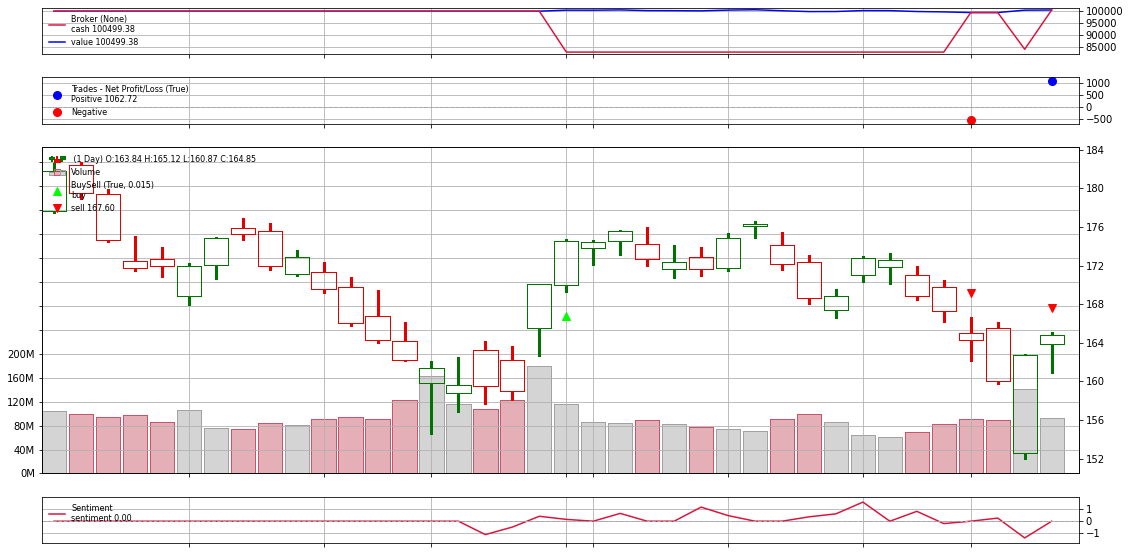

In [ ]:
# Run the strategy & plot the results
set_and_run(data,
            SentimentStrategy,
            startcash,
            commission,
            stake)